<h1 style="text-align: center; font-weight: bold;"><u>Étape 3 Identifier et traiter les valeurs manquantes</u></h1>

<h2 style="font-weight: bold;">A) <u>Nettoyer les données</u></h2>

In [7]:
# Importation des bibliothèques pandas et numpy
import pandas as pd
import numpy as np

# Cette fonction lit un fichier csv et l'importe dans une variable.
nutritionalProducts  = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Sélectionne les colonnes spécifiques qu'on souhaite
colonnes_specifiques = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'calcium_100g', 'energy-from-fat_100g']

# Calculer le taux de remplissage pour ces colonnes spécifiques
tauxRemplissageColonnesSpecifiques = nutritionalProducts[colonnes_specifiques].notnull().mean() * 100

seuil = 50  # On cherche les colonnes avec plus de 50% de valeurs manquantes

# Appliquer un seuil de 50% pour identifier les colonnes manquantes
colonnes_manquantes_specifiques = tauxRemplissageColonnesSpecifiques[tauxRemplissageColonnesSpecifiques <= seuil]

print("Colonnes spécifiques sélectionnées avec plus de 50% de valeurs manquantes :")
print(colonnes_manquantes_specifiques.sort_values())

Colonnes spécifiques sélectionnées avec plus de 50% de valeurs manquantes :
omega-6-fat_100g         0.058609
omega-3-fat_100g         0.262180
energy-from-fat_100g     0.267168
iron_100g               43.788735
calcium_100g            43.972042
dtype: float64


In [6]:
# Importation des bibliothèques pandas et numpy
import pandas as pd
import numpy as np
from myFonctions import remove_duplicates

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Sélectionner les colonnes spécifiques
colonnes_specifiques = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'calcium_100g', 'energy-from-fat_100g']

# Calculer le nombre de valeurs manquantes pour chaque colonne sélectionnée
number = nutritionalProducts[colonnes_specifiques].isnull().sum()

# Affichage du résultat
print(number)

omega-3-fat_100g        319931
omega-6-fat_100g        320584
iron_100g               180310
calcium_100g            179722
energy-from-fat_100g    319915
dtype: int64


In [8]:
# Importation des bibliothèques pandas et numpy
import pandas as pd
import numpy as np
from myFonctions import remove_duplicates

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Sélectionner les colonnes spécifiques
colonnes_specifiques = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'calcium_100g', 'energy-from-fat_100g']

# Afficher les types de données des colonnes spécifiques
types_colonnes_specifiques = nutritionalProducts[colonnes_specifiques].dtypes

print(types_colonnes_specifiques)


omega-3-fat_100g        float64
omega-6-fat_100g        float64
iron_100g               float64
calcium_100g            float64
energy-from-fat_100g    float64
dtype: object


<h3 style="font-weight: bold;"><u>Remplacement NAN par le mode</u></h3>

In [1]:
# Importation des bibliothèques pandas et numpy
import pandas as pd
import numpy as np
from myFonctions import calculate_mode

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Exemple d'application des fonctions sur les colonnes spécifiques
colonnes_specifiques = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'calcium_100g', 'energy-from-fat_100g']

# Calcul du mode
mode_result = calculate_mode(nutritionalProducts, columns=colonnes_specifiques)
print("Mode des colonnes spécifiées :")
print(mode_result)

Mode des colonnes spécifiées :
   omega-3-fat_100g  omega-6-fat_100g  iron_100g  calcium_100g  \
0               2.0               1.1        0.0           0.0   

   energy-from-fat_100g  
0                   0.0  


In [1]:
# Importation des bibliothèques pandas et numpy
import pandas as pd
import numpy as np
from myFonctions import replace_nan_with_stat

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Exemple d'application des fonctions sur les colonnes spécifiques
colonnes_specifiques = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'calcium_100g', 'energy-from-fat_100g']

print("\nValeurs NaN avant remplacement:")
print(nutritionalProducts[colonnes_specifiques].isna().sum())

df_mode_replaced = replace_nan_with_stat(nutritionalProducts, columns=colonnes_specifiques, stat='mode')

print("\nValeurs NaN après remplacement:")
print(df_mode_replaced[colonnes_specifiques].isna().sum())



Valeurs NaN avant remplacement:
omega-3-fat_100g        319931
omega-6-fat_100g        320584
iron_100g               180310
calcium_100g            179722
energy-from-fat_100g    319915
dtype: int64

Valeurs NaN après remplacement:
omega-3-fat_100g        0
omega-6-fat_100g        0
iron_100g               0
calcium_100g            0
energy-from-fat_100g    0
dtype: int64


<h3 style="font-weight: bold;"><u>Remplacement NAN par la moyenne</u></h3>

In [2]:
# Importation des bibliothèques pandas et numpy
import pandas as pd
import numpy as np
from myFonctions import calculate_mean

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Exemple d'application des fonctions sur les colonnes spécifiques
colonnes_specifiques = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'calcium_100g', 'energy-from-fat_100g']

# Calcul de la moyenne
mean_result = calculate_mean(nutritionalProducts, columns=colonnes_specifiques)
print("\nMoyenne des colonnes spécifiées :")
print(mean_result)


Moyenne des colonnes spécifiées :
omega-3-fat_100g          3.182103
omega-6-fat_100g         16.229144
iron_100g                 0.003652
calcium_100g              0.125163
energy-from-fat_100g    585.501214
dtype: float64


In [4]:
# Importation des bibliothèques pandas et numpy
import pandas as pd
import numpy as np
from myFonctions import replace_nan_with_stat

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Exemple d'application des fonctions sur les colonnes spécifiques
colonnes_specifiques = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'calcium_100g', 'energy-from-fat_100g']

print("\nValeurs NaN avant remplacement:")
print(nutritionalProducts[colonnes_specifiques].isna().sum())

df_mean_replaced = replace_nan_with_stat(nutritionalProducts, columns=colonnes_specifiques, stat='mean')

print("\nValeurs NaN après remplacement:")
print(df_mean_replaced[colonnes_specifiques].isna().sum())



Valeurs NaN avant remplacement:
omega-3-fat_100g        319931
omega-6-fat_100g        320584
iron_100g               180310
calcium_100g            179722
energy-from-fat_100g    319915
dtype: int64

Valeurs NaN après remplacement:
omega-3-fat_100g        0
omega-6-fat_100g        0
iron_100g               0
calcium_100g            0
energy-from-fat_100g    0
dtype: int64


<h3 style="font-weight: bold;"><u>Remplacement NAN par la médiane</u></h3>

In [3]:
# Importation des bibliothèques pandas et numpy
import pandas as pd
import numpy as np
from myFonctions import calculate_median

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Exemple d'application des fonctions sur les colonnes spécifiques
colonnes_specifiques = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'calcium_100g', 'energy-from-fat_100g']

# Calcul de la médiane
median_result = calculate_median(nutritionalProducts, columns=colonnes_specifiques)
print("\nMédiane des colonnes spécifiées :")
print(median_result)


Médiane des colonnes spécifiées :
omega-3-fat_100g          1.80000
omega-6-fat_100g         10.05000
iron_100g                 0.00101
calcium_100g              0.03500
energy-from-fat_100g    300.00000
dtype: float64


In [5]:
# Importation des bibliothèques pandas et numpy
import pandas as pd
import numpy as np
from myFonctions import replace_nan_with_stat

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Exemple d'application des fonctions sur les colonnes spécifiques
colonnes_specifiques = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'calcium_100g', 'energy-from-fat_100g']

print("\nValeurs NaN avant remplacement:")
print(nutritionalProducts[colonnes_specifiques].isna().sum())

df_median_replaced = replace_nan_with_stat(nutritionalProducts, columns=colonnes_specifiques, stat='median')

print("\nValeurs NaN après remplacement:")
print(df_median_replaced[colonnes_specifiques].isna().sum())



Valeurs NaN avant remplacement:
omega-3-fat_100g        319931
omega-6-fat_100g        320584
iron_100g               180310
calcium_100g            179722
energy-from-fat_100g    319915
dtype: int64

Valeurs NaN après remplacement:
omega-3-fat_100g        0
omega-6-fat_100g        0
iron_100g               0
calcium_100g            0
energy-from-fat_100g    0
dtype: int64


In [10]:
# Importation des bibliothèques pandas, numpy, la fonction display_boxplot_with_stats et la fonction replace_nan_with_stat
import pandas as pd
import numpy as np
from myFonctions import display_boxplot_with_stats
from myFonctions import replace_nan_with_stat

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Exemple d'application des fonctions sur les colonnes spécifiques
colonnes_specifiques = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'calcium_100g', 'energy-from-fat_100g']

df_median_replaced = replace_nan_with_stat(nutritionalProducts, columns=colonnes_specifiques, stat='median')
print(df_median_replaced[colonnes_specifiques].describe())  # Vérifie les statistiques générales

       omega-3-fat_100g  omega-6-fat_100g      iron_100g   calcium_100g  \
count     320772.000000     320772.000000  320772.000000  320772.000000   
mean           1.803624         10.053622       0.002167       0.074647   
std            0.295553          0.448506       0.141886       2.200838   
min            0.000000          0.050000      -0.000260       0.000000   
25%            1.800000         10.050000       0.001010       0.035000   
50%            1.800000         10.050000       0.001010       0.035000   
75%            1.800000         10.050000       0.001010       0.035000   
max           60.000000         71.000000      50.000000     694.737000   

       energy-from-fat_100g  
count         320772.000000  
mean             300.762768  
std               39.662140  
min                0.000000  
25%              300.000000  
50%              300.000000  
75%              300.000000  
max             3830.000000  


<h3 style="font-weight: bold;"><u>Valeurs aberrantes</u></h3>

<h4 style="font-weight: bold;"><u>omega-3-fat_100g</u></h4> 

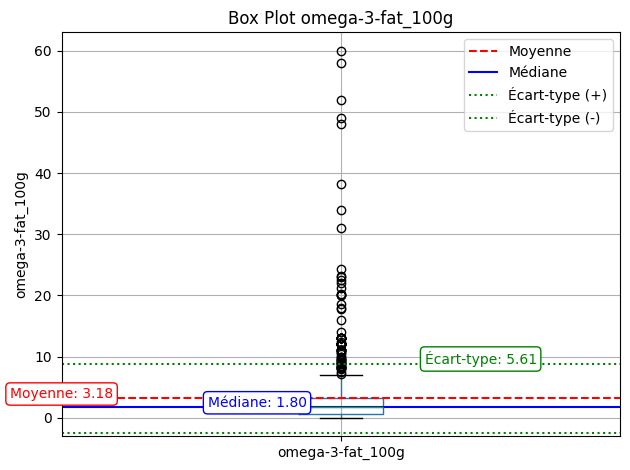

In [1]:
# Importation des bibliothèques pandas, numpy, la fonction display_boxplot_with_stats et la fonction replace_nan_with_stat
import pandas as pd
import numpy as np
from myFonctions import display_boxplot_with_stats
from myFonctions import replace_nan_with_stat

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Cette fonction affiche le box plot pour la variable 'omega-3-fat_100g' sans remplacer les nan
display_boxplot_with_stats(nutritionalProducts, 'omega-3-fat_100g')

C:\Users\david\AppData\Local\pypoetry\Cache\virtualenvs\smartcity-ikQj8sYD-py3.13\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


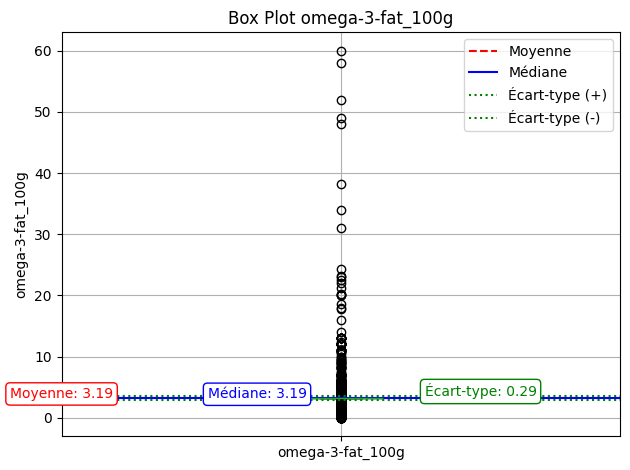

   omega-3-fat_100g  omega-6-fat_100g
0          3.191027               NaN
1          3.191027               NaN
2          3.191027               NaN
3          3.191027               NaN
4          3.191027               NaN


In [2]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from myFonctions import display_boxplot_with_stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Sélectionner les colonnes à utiliser pour l'imputation
colonnes_specifiques = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'calcium_100g', 'energy-from-fat_100g']

# Sélectionner les colonnes pertinentes pour l'imputation
df = nutritionalProducts[['omega-3-fat_100g', 'omega-6-fat_100g']]  # Ne conserver que les colonnes essentielles

# Séparer les lignes où 'omega-3-fat_100g' n'a pas de valeur (NaN)
df_no_nan = df.dropna(subset=['omega-3-fat_100g'])

# Séparer les lignes où 'omega-3-fat_100g' a une valeur manquante
df_nan = df[df['omega-3-fat_100g'].isna()]

# Définir X (variables explicatives) et y (variable à prédire) pour les lignes sans NaN
X = df_no_nan.drop(columns=['omega-3-fat_100g'])  # On retire la colonne 'omega-3-fat_100g'
y = df_no_nan['omega-3-fat_100g']

# Imputer les valeurs manquantes dans X (pour que le modèle puisse s'entraîner)
imputer = SimpleImputer(strategy='mean')  # Remplace les NaN par la moyenne
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Diviser les données en un jeu d'entraînement et un jeu de test (pour valider le modèle)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialiser le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédire les valeurs de 'omega-3-fat_100g' pour les lignes avec NaN
X_nan = df_nan.drop(columns=['omega-3-fat_100g'])  # Sélectionner les colonnes explicatives
X_nan_imputed = imputer.transform(X_nan)  # Appliquer l'imputation aux données avec NaN
y_pred = model.predict(X_nan_imputed)

# Créer une copie du DataFrame pour éviter l'avertissement de modification de vue
df_copy = df.copy()

# Remplacer les NaN par les prédictions du modèle
df_copy.loc[df_copy['omega-3-fat_100g'].isna(), 'omega-3-fat_100g'] = y_pred

# Afficher un boxplot de la colonne 'omega-3-fat_100g' après imputation
display_boxplot_with_stats(df_copy, column_name='omega-3-fat_100g')

# Vérification du résultat
print(df_copy.head())


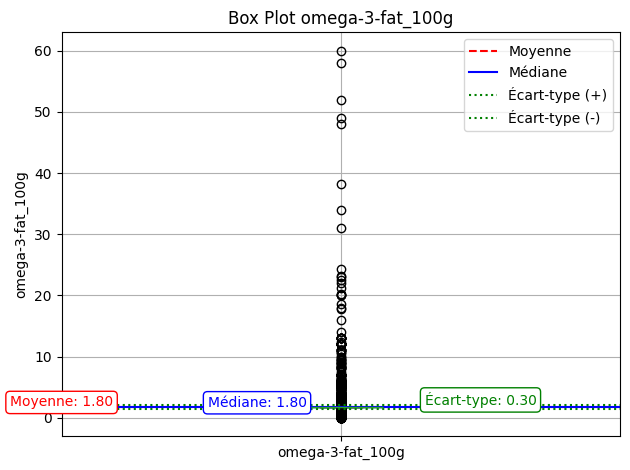

In [1]:
# Importation des bibliothèques pandas, numpy, la fonction display_boxplot_with_stats et la fonction replace_nan_with_stat
import pandas as pd
import numpy as np
from myFonctions import display_boxplot_with_stats
from myFonctions import replace_nan_with_stat

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Sélection des colonnes spécifiques à traiter
colonnes_specifiques = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'calcium_100g', 'energy-from-fat_100g']

df_median_replaced = replace_nan_with_stat(nutritionalProducts, columns=colonnes_specifiques, stat='median')

display_boxplot_with_stats(df_median_replaced, 'omega-3-fat_100g')


In [ ]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
from myFonctions import display_boxplot_with_stats
from myFonctions import replace_nan_with_stat
from sklearn.impute import KNNImputer

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Sélection des colonnes spécifiques à traiter
colonnes_specifiques = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'calcium_100g', 'energy-from-fat_100g']

# Sélectionner la colonne et la transformer en DataFrame
df = nutritionalProducts[['omega-3-fat_100g']]  # Utiliser une double liste pour garder le format 2D

# Initialisation du k-NN Imputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")

# Application de l'imputation
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Vérification du résultat
df_imputed.head()




In [1]:
from sklearn.impute import KNNImputer
import numpy as np
import pandas as pd

# Création d'un dataset avec des valeurs manquantes
data = np.array([[1, 2, np.nan], [3, np.nan, 6], [7, 8, 9]])
df = pd.DataFrame(data, columns=["A", "B", "C"])

# Initialisation du k-NN Imputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")

# Application de l'imputation
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print(df_imputed)


     A    B    C
0  1.0  2.0  7.5
1  3.0  5.0  6.0
2  7.0  8.0  9.0


In [2]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# Initialisation de l'imputer basé sur une régression bayésienne
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=42)

# Application de l'imputation
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print(df_imputed)

     A         B         C
0  1.0  2.000000  4.500272
1  3.0  3.999519  6.000000
2  7.0  8.000000  9.000000


In [2]:
# Importation des bibliothèques pandas, numpy, la fonction display_boxplot_with_stats et la fonction replace_nan_with_stat
import pandas as pd
import numpy as np
from myFonctions import display_boxplot_with_stats
from myFonctions import replace_nan_with_stat
from myFonctions import detect_outliers
from myFonctions import replace_outliers

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Exemple d'application des fonctions sur les colonnes spécifiques
colonnes_specifiques = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'calcium_100g', 'energy-from-fat_100g']

# Détection des outliers
outliers_detected = detect_outliers(nutritionalProducts, columns=colonnes_specifiques, method="IQR", plausibility_check=True)

# Remplacement des outliers par la médiane
df_cleaned = replace_outliers(nutritionalProducts, outliers_detected, columns=colonnes_specifiques, strategy="median")

# Afficher les résultats
print("\nNombre d'outliers détectés par colonne :")
print(outliers_detected.sum())

print("\nValeurs NaN restantes après remplacement des outliers :")
print(df_cleaned[colonnes_specifiques].isna().sum())

🔹 omega-3-fat_100g - Valeur utilisée pour remplacer les outliers : 1.8
🔹 omega-6-fat_100g - Valeur utilisée pour remplacer les outliers : 10.05
🔹 iron_100g - Valeur utilisée pour remplacer les outliers : 0.00101
🔹 calcium_100g - Valeur utilisée pour remplacer les outliers : 0.035
🔹 energy-from-fat_100g - Valeur utilisée pour remplacer les outliers : 300.0

Nombre d'outliers détectés par colonne :
omega-3-fat_100g           73
omega-6-fat_100g           17
iron_100g                6550
calcium_100g            12104
energy-from-fat_100g      211
dtype: int64

Valeurs NaN restantes après remplacement des outliers :
omega-3-fat_100g        0
omega-6-fat_100g        0
iron_100g               0
calcium_100g            0
energy-from-fat_100g    0
dtype: int64


🔹 omega-3-fat_100g - Valeur utilisée pour remplacer les outliers : 1.8
🔹 omega-6-fat_100g - Valeur utilisée pour remplacer les outliers : 10.05
🔹 iron_100g - Valeur utilisée pour remplacer les outliers : 0.00101
🔹 calcium_100g - Valeur utilisée pour remplacer les outliers : 0.035
🔹 energy-from-fat_100g - Valeur utilisée pour remplacer les outliers : 300.0


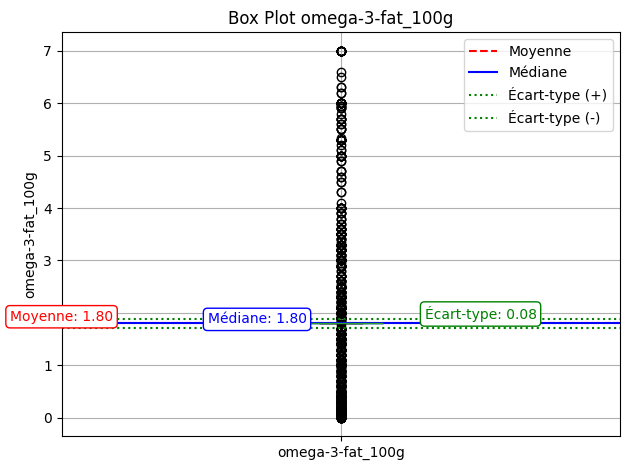

In [6]:
# Importation des bibliothèques pandas, numpy, la fonction display_boxplot_with_stats et la fonction replace_nan_with_stat
import pandas as pd
import numpy as np
from myFonctions import display_boxplot_with_stats
from myFonctions import replace_nan_with_stat
from myFonctions import detect_outliers
from myFonctions import replace_outliers

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Exemple d'application des fonctions sur les colonnes spécifiques
colonnes_specifiques = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'calcium_100g', 'energy-from-fat_100g']

# Détection des outliers
outliers_detected = detect_outliers(nutritionalProducts, columns=colonnes_specifiques, method="IQR", plausibility_check=True)

# Remplacement des outliers par la médiane
df_cleaned = replace_outliers(nutritionalProducts, outliers_detected, columns=colonnes_specifiques, strategy="median")

# Cette fonction affiche le box plot pour la variable 'geo_point_2d_a'
display_boxplot_with_stats(df_cleaned, 'omega-3-fat_100g')

<h4 style="font-weight: bold;"><u>omega-6-fat_100g</u></h4> 

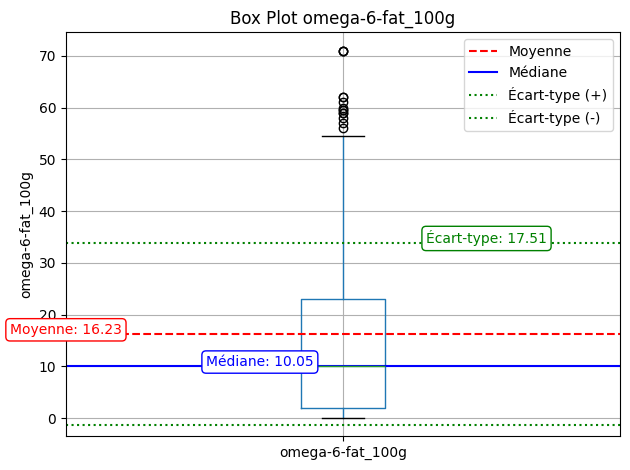

In [4]:
# Importation des bibliothèques pandas, numpy, la fonction display_boxplot_with_stats et la fonction replace_nan_with_stat
import pandas as pd
import numpy as np
from myFonctions import display_boxplot_with_stats
from myFonctions import replace_nan_with_stat

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Cette fonction affiche le box plot pour la variable 'omega-3-fat_100g' sans remplacer les nan
display_boxplot_with_stats(nutritionalProducts, 'omega-6-fat_100g')

🔹 omega-3-fat_100g - Valeur utilisée pour remplacer les outliers : 1.8
🔹 omega-6-fat_100g - Valeur utilisée pour remplacer les outliers : 10.05
🔹 iron_100g - Valeur utilisée pour remplacer les outliers : 0.00101
🔹 calcium_100g - Valeur utilisée pour remplacer les outliers : 0.035
🔹 energy-from-fat_100g - Valeur utilisée pour remplacer les outliers : 300.0


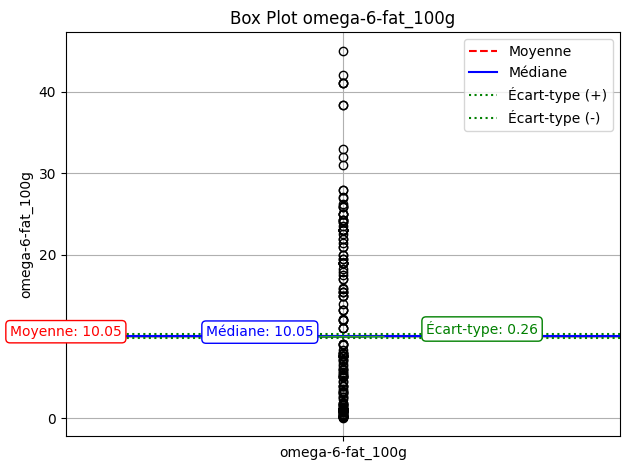

In [7]:
# Importation des bibliothèques pandas, numpy, la fonction display_boxplot_with_stats et la fonction replace_nan_with_stat
import pandas as pd
import numpy as np
from myFonctions import display_boxplot_with_stats
from myFonctions import replace_nan_with_stat
from myFonctions import detect_outliers
from myFonctions import replace_outliers

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Exemple d'application des fonctions sur les colonnes spécifiques
colonnes_specifiques = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'calcium_100g', 'energy-from-fat_100g']

# Détection des outliers
outliers_detected = detect_outliers(nutritionalProducts, columns=colonnes_specifiques, method="IQR", plausibility_check=True)

# Remplacement des outliers par la médiane
df_cleaned = replace_outliers(nutritionalProducts, outliers_detected, columns=colonnes_specifiques, strategy="median")

# Cette fonction affiche le box plot pour la variable 'geo_point_2d_a'
display_boxplot_with_stats(df_cleaned, 'omega-6-fat_100g')

<h4 style="font-weight: bold;"><u>iron_100g</u></h4> 

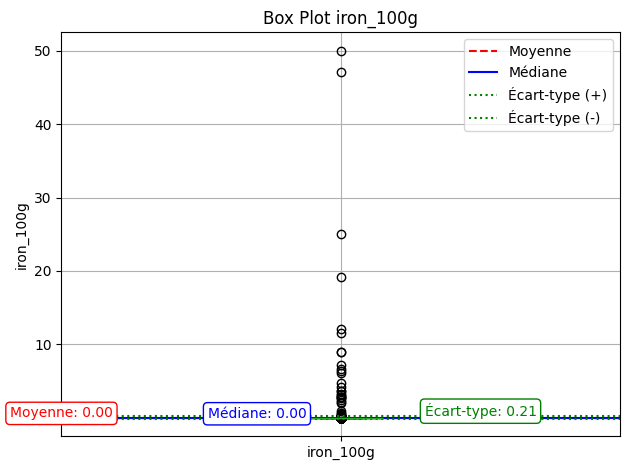

In [5]:
# Importation des bibliothèques pandas, numpy, la fonction display_boxplot_with_stats et la fonction replace_nan_with_stat
import pandas as pd
import numpy as np
from myFonctions import display_boxplot_with_stats
from myFonctions import replace_nan_with_stat

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Cette fonction affiche le box plot pour la variable 'omega-3-fat_100g' sans remplacer les nan
display_boxplot_with_stats(nutritionalProducts, 'iron_100g')

🔹 omega-3-fat_100g - Valeur utilisée pour remplacer les outliers : 1.8
🔹 omega-6-fat_100g - Valeur utilisée pour remplacer les outliers : 10.05
🔹 iron_100g - Valeur utilisée pour remplacer les outliers : 0.00101
🔹 calcium_100g - Valeur utilisée pour remplacer les outliers : 0.035
🔹 energy-from-fat_100g - Valeur utilisée pour remplacer les outliers : 300.0


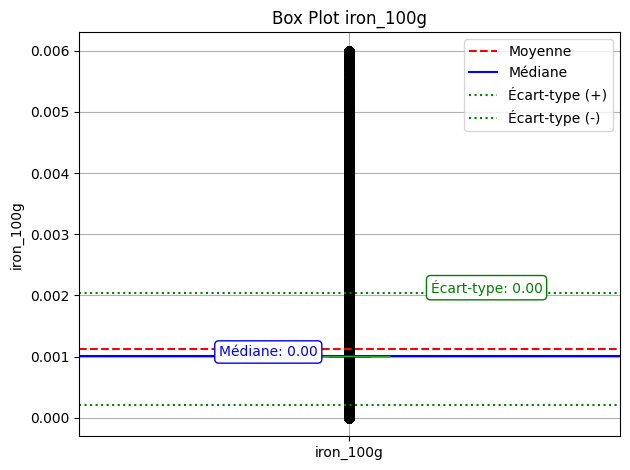

In [8]:
# Importation des bibliothèques pandas, numpy, la fonction display_boxplot_with_stats et la fonction replace_nan_with_stat
import pandas as pd
import numpy as np
from myFonctions import display_boxplot_with_stats
from myFonctions import replace_nan_with_stat
from myFonctions import detect_outliers
from myFonctions import replace_outliers

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Exemple d'application des fonctions sur les colonnes spécifiques
colonnes_specifiques = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'calcium_100g', 'energy-from-fat_100g']

# Détection des outliers
outliers_detected = detect_outliers(nutritionalProducts, columns=colonnes_specifiques, method="IQR", plausibility_check=True)

# Remplacement des outliers par la médiane
df_cleaned = replace_outliers(nutritionalProducts, outliers_detected, columns=colonnes_specifiques, strategy="median")

# Cette fonction affiche le box plot pour la variable 'geo_point_2d_a'
display_boxplot_with_stats(df_cleaned, 'iron_100g')

<h4 style="font-weight: bold;"><u>calcium_100g</u></h4> 

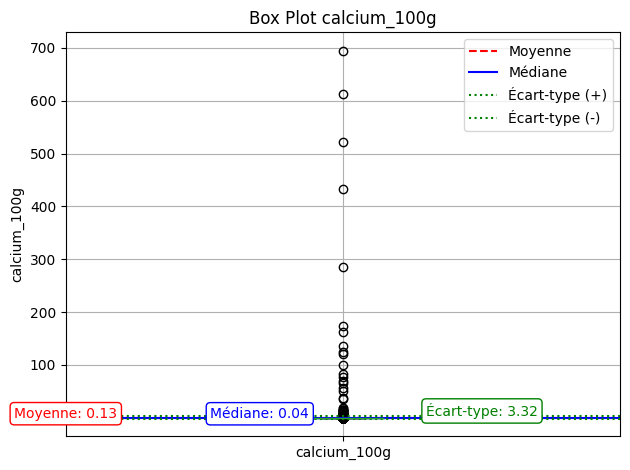

In [6]:
# Importation des bibliothèques pandas, numpy, la fonction display_boxplot_with_stats et la fonction replace_nan_with_stat
import pandas as pd
import numpy as np
from myFonctions import display_boxplot_with_stats
from myFonctions import replace_nan_with_stat

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Cette fonction affiche le box plot pour la variable 'omega-3-fat_100g' sans remplacer les nan
display_boxplot_with_stats(nutritionalProducts, 'calcium_100g')

🔹 omega-3-fat_100g - Valeur utilisée pour remplacer les outliers : 1.8
🔹 omega-6-fat_100g - Valeur utilisée pour remplacer les outliers : 10.05
🔹 iron_100g - Valeur utilisée pour remplacer les outliers : 0.00101
🔹 calcium_100g - Valeur utilisée pour remplacer les outliers : 0.035
🔹 energy-from-fat_100g - Valeur utilisée pour remplacer les outliers : 300.0


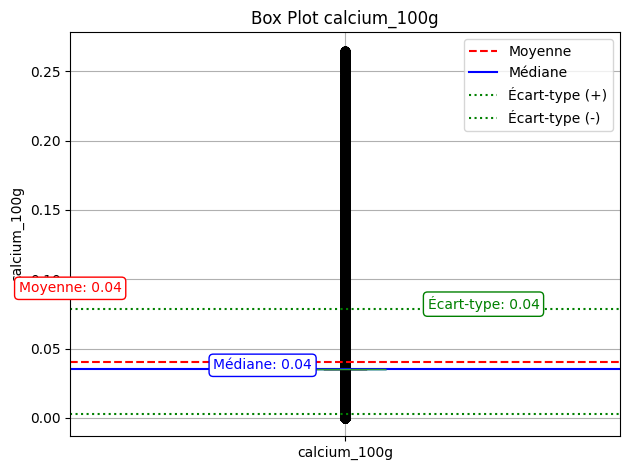

In [9]:
# Importation des bibliothèques pandas, numpy, la fonction display_boxplot_with_stats et la fonction replace_nan_with_stat
import pandas as pd
import numpy as np
from myFonctions import display_boxplot_with_stats
from myFonctions import replace_nan_with_stat
from myFonctions import detect_outliers
from myFonctions import replace_outliers

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Exemple d'application des fonctions sur les colonnes spécifiques
colonnes_specifiques = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'calcium_100g', 'energy-from-fat_100g']

# Détection des outliers
outliers_detected = detect_outliers(nutritionalProducts, columns=colonnes_specifiques, method="IQR", plausibility_check=True)

# Remplacement des outliers par la médiane
df_cleaned = replace_outliers(nutritionalProducts, outliers_detected, columns=colonnes_specifiques, strategy="median")

# Cette fonction affiche le box plot pour la variable 'geo_point_2d_a'
display_boxplot_with_stats(df_cleaned, 'calcium_100g')

<h4 style="font-weight: bold;"><u>energy-from-fat_100g</u></h4> 

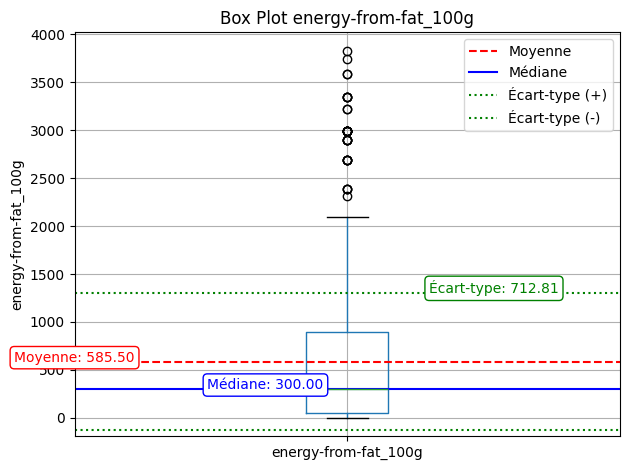

In [7]:
# Importation des bibliothèques pandas, numpy, la fonction display_boxplot_with_stats et la fonction replace_nan_with_stat
import pandas as pd
import numpy as np
from myFonctions import display_boxplot_with_stats
from myFonctions import replace_nan_with_stat

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Cette fonction affiche le box plot pour la variable 'omega-3-fat_100g' sans remplacer les nan
display_boxplot_with_stats(nutritionalProducts, 'energy-from-fat_100g')

🔹 omega-3-fat_100g - Valeur utilisée pour remplacer les outliers : 1.8
🔹 omega-6-fat_100g - Valeur utilisée pour remplacer les outliers : 10.05
🔹 iron_100g - Valeur utilisée pour remplacer les outliers : 0.00101
🔹 calcium_100g - Valeur utilisée pour remplacer les outliers : 0.035
🔹 energy-from-fat_100g - Valeur utilisée pour remplacer les outliers : 300.0


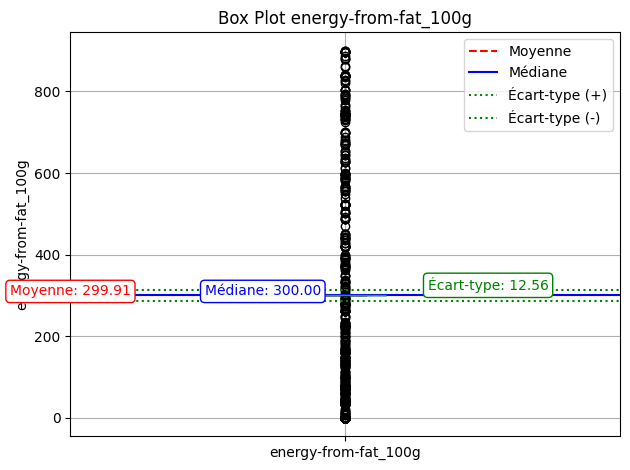

In [1]:
# Importation des bibliothèques pandas, numpy, la fonction display_boxplot_with_stats et la fonction replace_nan_with_stat
import pandas as pd
import numpy as np
from myFonctions import display_boxplot_with_stats
from myFonctions import display_boxplot_with_stats2
from myFonctions import replace_nan_with_stat
from myFonctions import detect_outliers
from myFonctions import replace_outliers

# Lire le fichier CSV
nutritionalProducts = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Exemple d'application des fonctions sur les colonnes spécifiques
colonnes_specifiques = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'calcium_100g', 'energy-from-fat_100g']

# Détection des outliers
outliers_detected = detect_outliers(nutritionalProducts, columns=colonnes_specifiques, method="IQR", plausibility_check=True)

# Remplacement des outliers par la médiane
df_cleaned = replace_outliers(nutritionalProducts, outliers_detected, columns=colonnes_specifiques, strategy="median")

# Cette fonction affiche le box plot pour la variable 'geo_point_2d_a'
display_boxplot_with_stats(df_cleaned, 'energy-from-fat_100g')

<h1>Pour les graphiques ou la moustache est écrasé, il faut ajouter les valeurs (texte en-dessous) pour mmieux visualiser les outliers</h1>